# Multivariate

## One type of imputation algorithm is Multivariate, which imputes values with using Multiple columns values


# KNN Imputer

## KNNImputer by scikit-learn is a widely used method to impute missing values. It is widely being observed as a replacement for traditional imputation techniques.

## DrawBack And Advantages

* ## Accurate Result
* ## More No of Calculation
* ## Need X_train Data After Deployment

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import  train_test_split
from sklearn.impute import KNNImputer,SimpleImputer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("./train.csv")[["Age","Pclass","Fare","Survived"]]
df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [3]:
df.isnull().mean() * 100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [4]:
x = df.drop(columns=["Survived"])
y = df.Survived

In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [6]:
xtrain.head()

,Age,Pclass,Fare
30,40.0,1,27.7208
10,4.0,3,16.7000
873,47.0,3,9.0000
182,9.0,3,31.3875
876,20.0,3,9.8458


# Apply Knn Imputer

###  class sklearn.impute.KNNImputer(*, 
* ### missing_values=nan, 
* ### n_neighbors=5, 
* ### weights='uniform', 
* ### metric='nan_euclidean', 
* ### copy=True, 
* ### add_indicator=False
# )

In [7]:
knn = KNNImputer()

xtrain_trf_r = knn.fit_transform(xtrain)
xtest_trf_r = knn.transform(xtest)

# Apply Algorithm

In [8]:
lr = LogisticRegression()

lr.fit(xtrain_trf_r,ytrain)

ypred = lr.predict(xtest_trf_r)

accuracy_score(ytest,ypred)

0.7039106145251397

# Change k 

In [9]:
for i in range(5,11):
    
    knn = KNNImputer(n_neighbors=i)
    
    xtrain_trf = knn.fit_transform(xtrain)
    xtest_trf = knn.transform(xtest)
    lr = LogisticRegression()
    lr.fit(xtrain_trf,ytrain)
    ypred = lr.predict(xtest_trf)

    print(i," --> ",accuracy_score(ytest,ypred),"\n")

5  -->  0.7039106145251397 

6  -->  0.7039106145251397 

7  -->  0.7039106145251397 

8  -->  0.6983240223463687 

9  -->  0.7039106145251397 

10  -->  0.7039106145251397 



# change default uniform to distance Weights

In [10]:
for i in range(5,11):
    
    knn = KNNImputer(n_neighbors=i,weights="distance")
    
    xtrain_trf = knn.fit_transform(xtrain)
    xtest_trf = knn.transform(xtest)
    lr = LogisticRegression()
    lr.fit(xtrain_trf,ytrain)
    ypred = lr.predict(xtest_trf)

    print(i," --> ",accuracy_score(ytest,ypred),"\n")

5  -->  0.7094972067039106 

6  -->  0.7039106145251397 

7  -->  0.7039106145251397 

8  -->  0.7039106145251397 

9  -->  0.7039106145251397 

10  -->  0.7039106145251397 



# Compare with mean with SimpleImputer 

In [11]:
si  = SimpleImputer()

xtrain_si = si.fit_transform(xtrain)
xtest_si = si.transform(xtest)

In [12]:
lr = LogisticRegression()
lr.fit(xtrain_si,ytrain)

ypred = lr.predict(xtest_si)
accuracy_score(ytest,ypred)

0.6927374301675978

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
xtrain_trf_r.shape ,xtrain.shape

((712, 3), (712, 3))

In [15]:
xtrain_org = pd.DataFrame(xtrain,columns=xtrain.columns)["Age"]
xtrain_kn = pd.DataFrame(xtrain_trf_r,columns=xtrain.columns)["Age"]
xtrain_si_r = pd.DataFrame(xtrain_si,columns=xtrain.columns)["Age"]

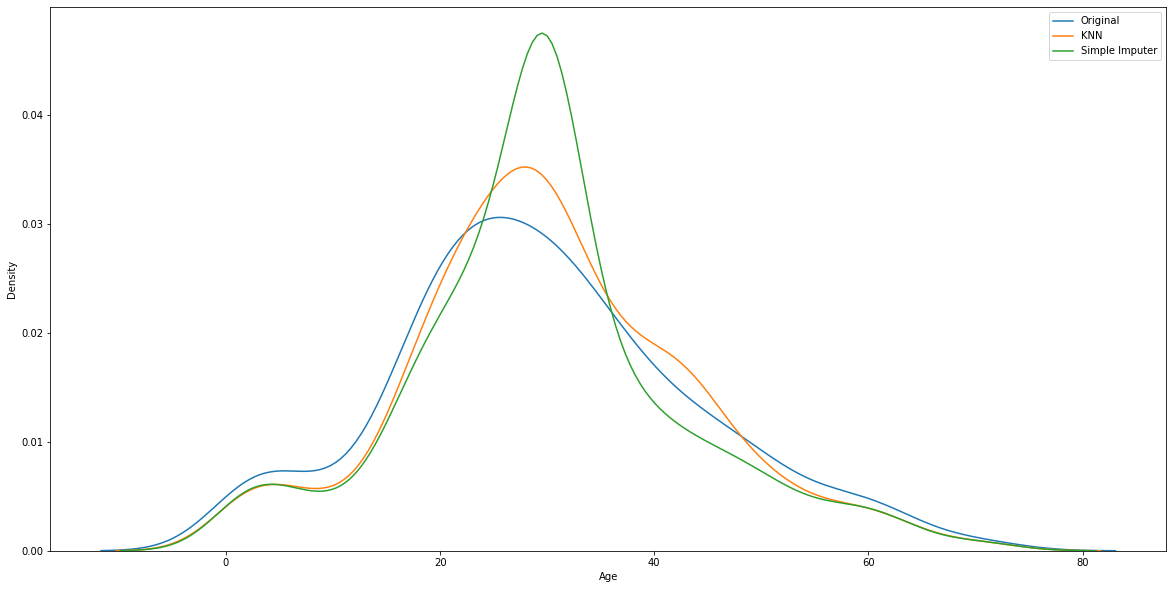

In [16]:
plt.figure(figsize=(20,10))

sns.kdeplot(xtrain_org,label="Original")
sns.kdeplot(xtrain_kn,label="KNN")
sns.kdeplot(xtrain_si_r,label="Simple Imputer")
plt.legend()
plt.show()